<a href="https://colab.research.google.com/github/Ahmedaboenaba/Machine-Learning/blob/main/Clustering/Bank_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Churn Prediction

## Objective: predicting the Customer Churn.

### Data Source: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/data

### Metadata
- RowNumber—corresponds to the record (row) number and has no effect on the output.
- CustomerId—contains random values and has no effect on customer leaving the bank.
- Surname—the surname of a customer has no impact on their decision to leave the bank.
- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography—a customer’s location can affect their decision to leave the bank.
-Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts—refers to the number of products that a customer has purchased through the bank.
- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember—active customers are less likely to leave the bank.
- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited—whether or not the customer left the bank.
- Complain—customer has complaint or not.
- Satisfaction Score—Score provided by the customer for their complaint resolution.
- Card Type—type of card hold by the customer.
- Points Earned—the points earned by the customer for using credit card.

## Pipeline
1. *step1*: Data exploration
2. *step2*: Data cleaning
3. *step3*: EDA
4. *step4*: Feature Engineering & Data Preprocessing
5. *step5*: unsupervised learning algos (Clustering & Dimensionality reduction )  
    - KMeans
    - DBSCAN
    - Hirerchichal Clustering
    - PCA
    - KMEANS
    - DBSCAN
    - Hirerchichal Clustering
6. *step6*: Classification or Regression (or Both) & Model evaluation.
    - Logistic Regression
    - Accuracy
    - Classification Report
    - ROC-AUC
    - Decision Tree
    - Accuracy
    - Classification report
    - ROC-AUC


### Necessary Libraries

In [ ]:
#Data manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import kagglehub #Call Data from Kaggle

#Data visualiztion
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Set style for plotting
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Other utilities
import warnings
import time

# Ignore warnings
warnings.filterwarnings('ignore')

#ML
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



### Data Loading

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("radheshyamkollipara/bank-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'bank-customer-churn' dataset.
Path to dataset files: /kaggle/input/bank-customer-churn


In [ ]:
churn = pd.read_csv(path+'/Customer-Churn-Records.csv') # Load Data

### Exploring

In [ ]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
churn.shape
# 10000 Rows, 18 Columns

(10000, 18)

In [ ]:
churn.info()
# 14 Numercal Columns, 4 Categorical Columns
# No missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
# check missing values
churn.isnull().sum()
# No Missing Values

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# check Duplicates by rows
if (churn.duplicated().sum()) >0:
  print(f"Found Duplicates: {churn.duplicated().sum()}")
else:
  print("No Duplicates")

No Duplicates


In [ ]:
# Check Duplicates by columns
if (churn.T.duplicated().sum()) >0:
  print(f"Found Duplicates: {churn.T.duplicated().sum()}")
else:
  print("No Duplicates by columns")

No Duplicates by columns


In [ ]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
churn.describe(include='object')

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


### Data Cleaning

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

columns = ['Gender','Card Type']
for i in columns :
  churn[i] = encoder.fit_transform(churn[i])

In [ ]:
#remove Unnecessary Columns
churn.drop(columns=['RowNumber','CustomerId','Surname','Geography'],inplace=True)

In [ ]:
churn.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


### EDA

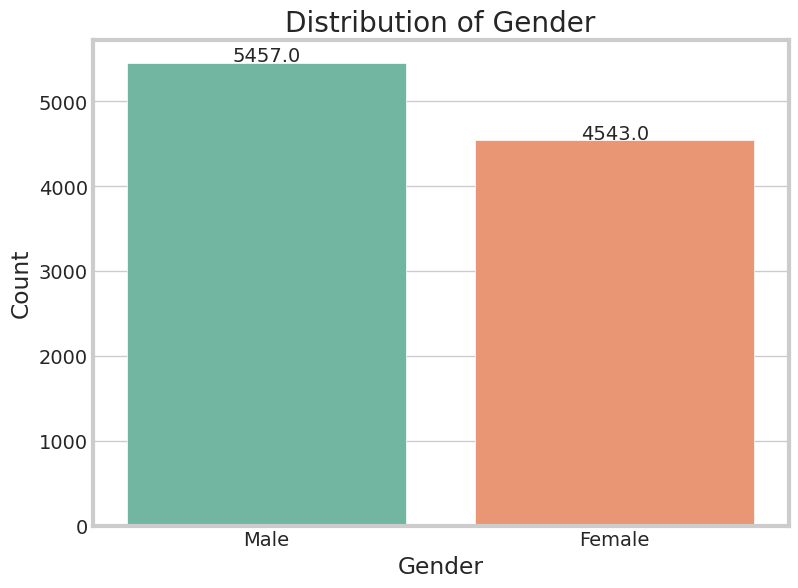

In [ ]:
#Distribution of Gender and show numbers of each class on the chart
labels = ['Male', 'Female']
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=churn, x='Gender', palette='Set2', order=churn['Gender'].value_counts().index)
plt.xticks(ticks=[0, 1], labels=labels)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

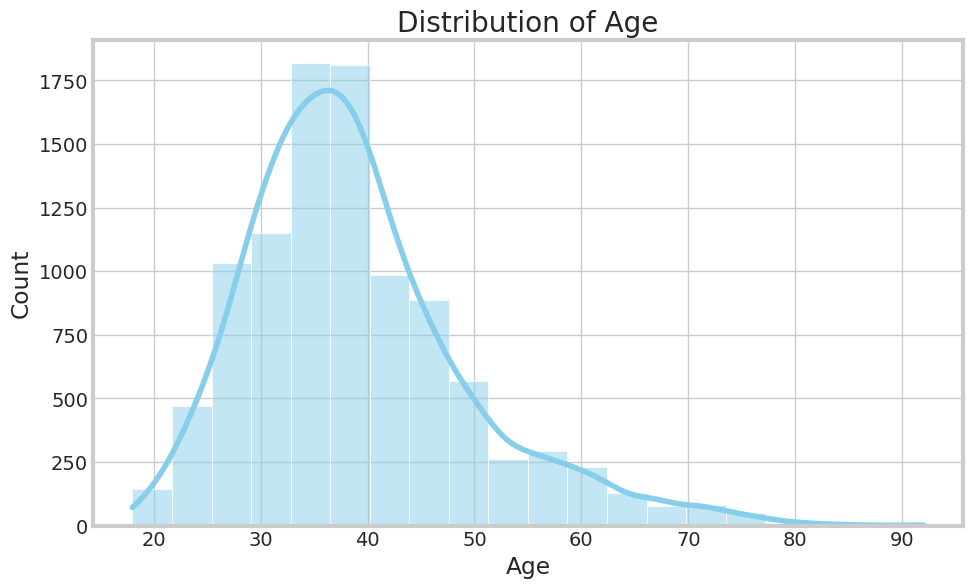

In [ ]:
# distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data=churn, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt

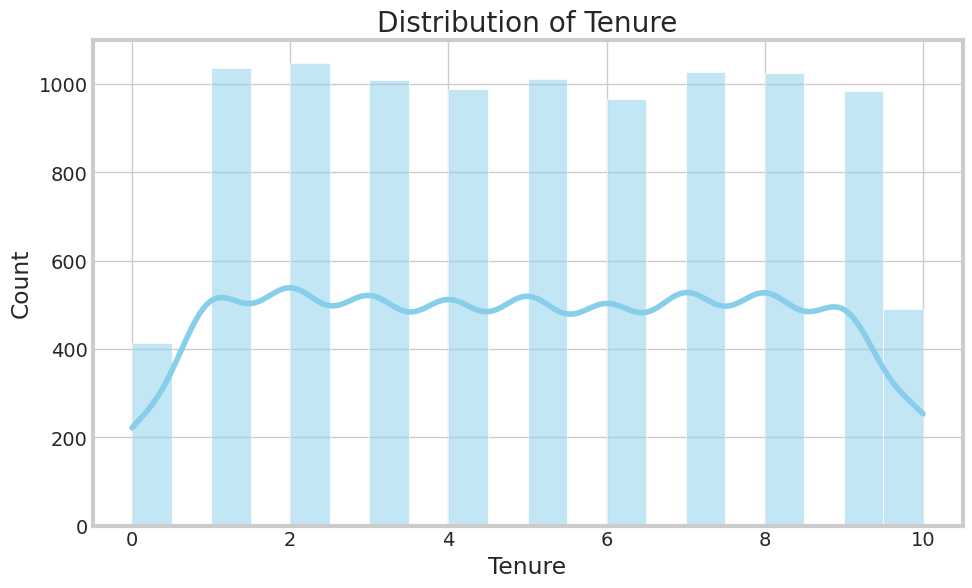

In [ ]:
# Distribution of Tenure
plt.figure(figsize=(10, 6))
sns.histplot(data=churn, x='Tenure', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

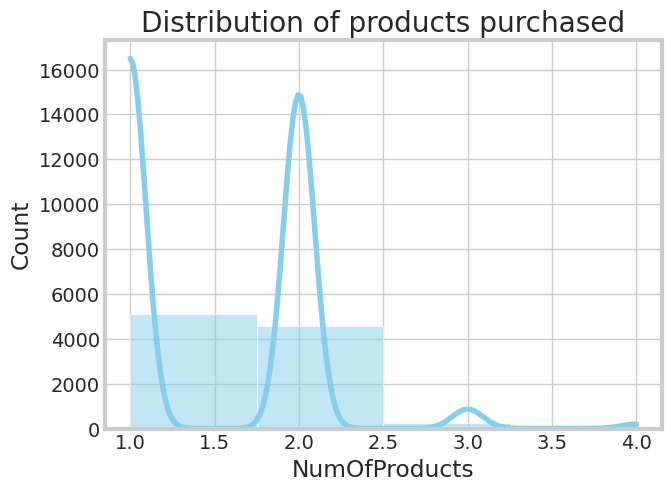

In [ ]:
#Distribution of purchased products
#plt.figure(figsize=(10, 6))
sns.histplot(data=churn, x='NumOfProducts', bins=4, kde=True, color='skyblue')
plt.title('Distribution of products purchased')
plt.xlabel('NumOfProducts')
plt

In [ ]:
churn['HasCrCard'].value_counts()

,count
HasCrCard,
1,7055
0,2945


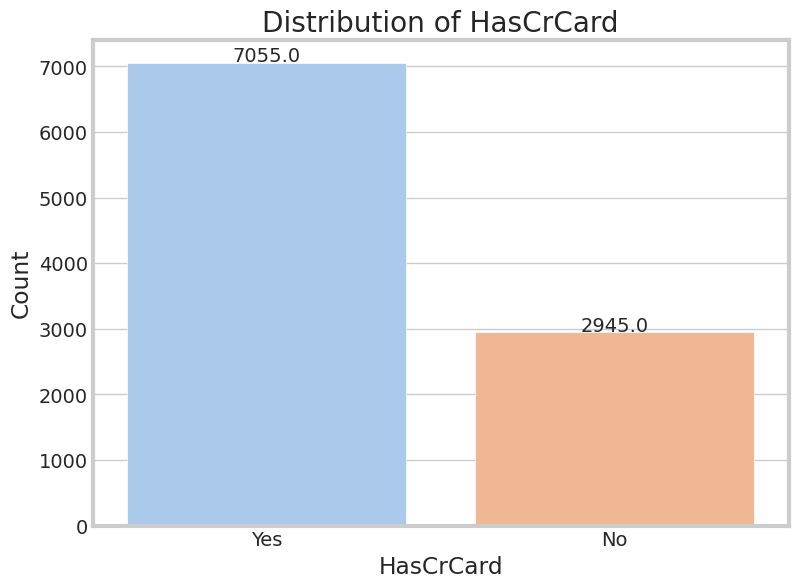

In [ ]:
# Distribution of customer has credit card or not
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=churn, x='HasCrCard', palette='pastel', order=churn['HasCrCard'].value_counts().index)
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'])
plt.title('Distribution of HasCrCard')
plt.xlabel('HasCrCard')
plt.ylabel('Count')

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

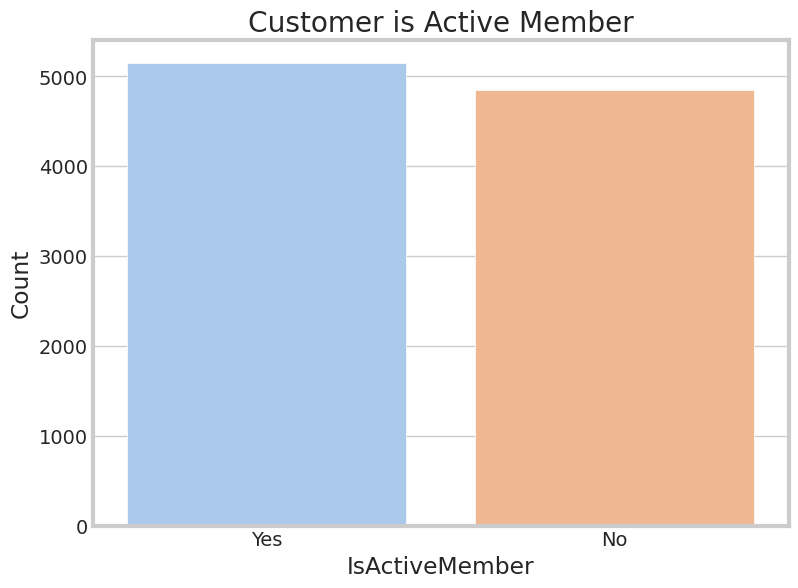

In [ ]:
#  Distribution of active Membre of customer
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=churn, x='IsActiveMember', palette='pastel', order=churn['IsActiveMember'].value_counts().index)
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'])
plt.title('Customer is Active Member')
plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.show()




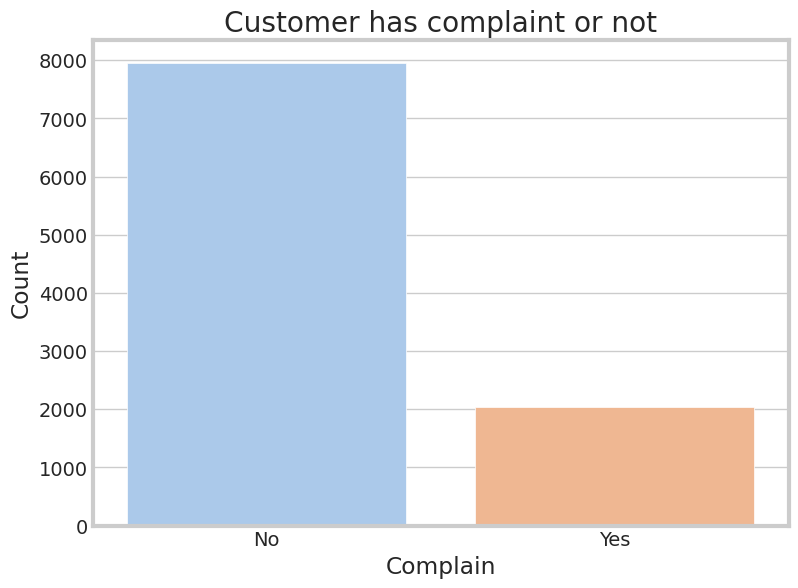

In [ ]:
# Customer has complaint or not
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=churn, x='Complain', palette='pastel', order=churn['Complain'].value_counts().index)
plt.xticks(ticks=[1, 0], labels=['Yes', 'No'])
plt.title('Customer has complaint or not')
plt.xlabel('Complain')
plt.ylabel('Count')
plt.show()

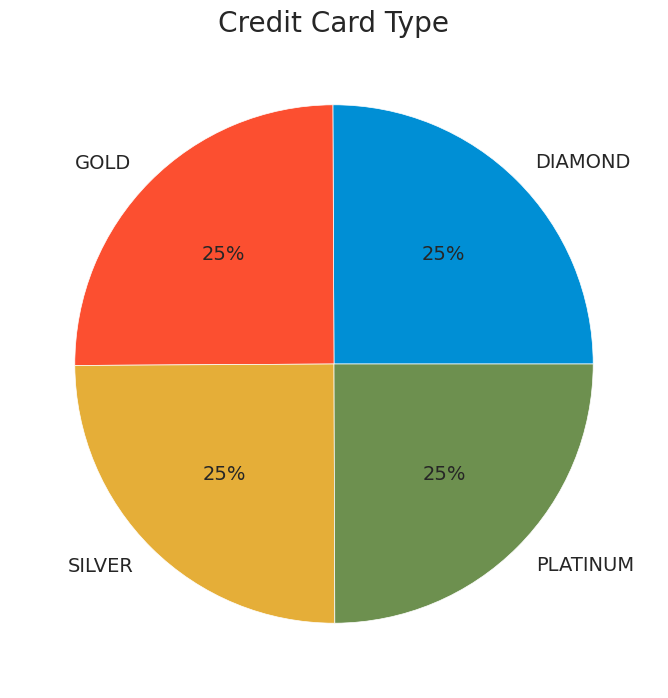

In [ ]:
values = churn['Card Type'].value_counts()
labels = ['DIAMOND', 'GOLD', 'SILVER','PLATINUM']

plt.figure(figsize=(8,8))
plt.pie(values,labels=labels, autopct='%.0f%%')
plt.title('Credit Card Type')
plt.show()

# explore the data with pieplot

In [ ]:
churn['Exited'].value_counts()

,count
Exited,
0,7962
1,2038


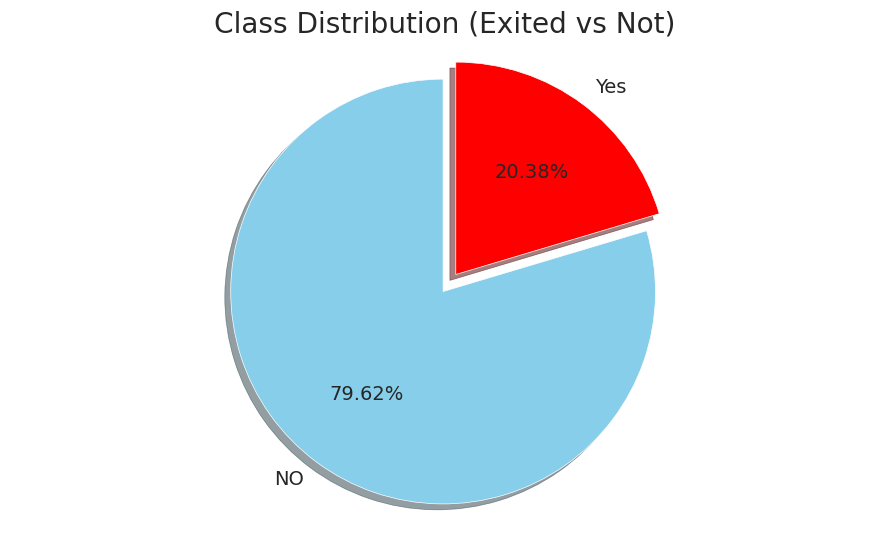

In [ ]:
class_counts = churn['Exited'].value_counts()

# Plot a pie chart to visualize the imbalance
plt.figure(figsize=(10, 6))
plt.pie(class_counts, labels=['NO', 'Yes'], autopct='%1.2f%%',
        colors=['skyblue', 'red'], explode=[0, 0.1], shadow=True, startangle=90)
plt.title('Class Distribution (Exited vs Not)')
plt.axis('equal')
plt.show()

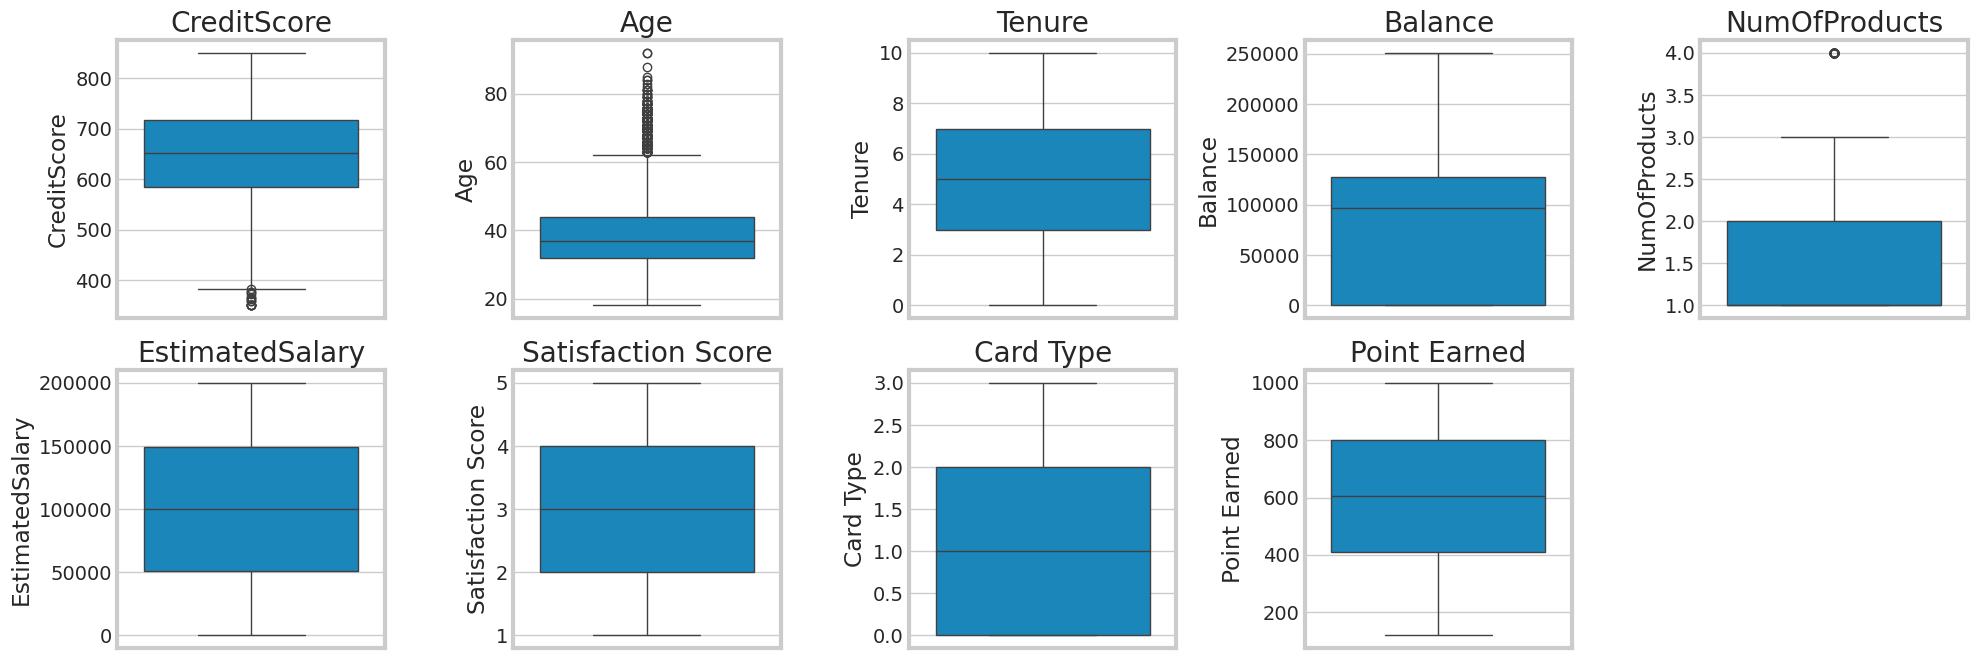

In [ ]:
# Visualize all features to see outliers
fig = plt.figure(figsize=(20, 20))

for i, col in enumerate(churn.drop(columns=["Exited","Gender","HasCrCard","IsActiveMember","Complain"]).columns):
    ax = fig.add_subplot(6, 5, i+1)
    sns.boxplot(data=churn, y=col)
    ax.set_title(col)

plt.tight_layout()
plt.show()

### Feature Engineerng & Preprocessing

In [ ]:
copy = churn.copy()

In [ ]:
# Splitting
X = copy.drop("Exited", axis=1)
y = copy["Exited"]

In [ ]:
#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Unsupervised Learning (Clustering + Dimensionality Reduction)

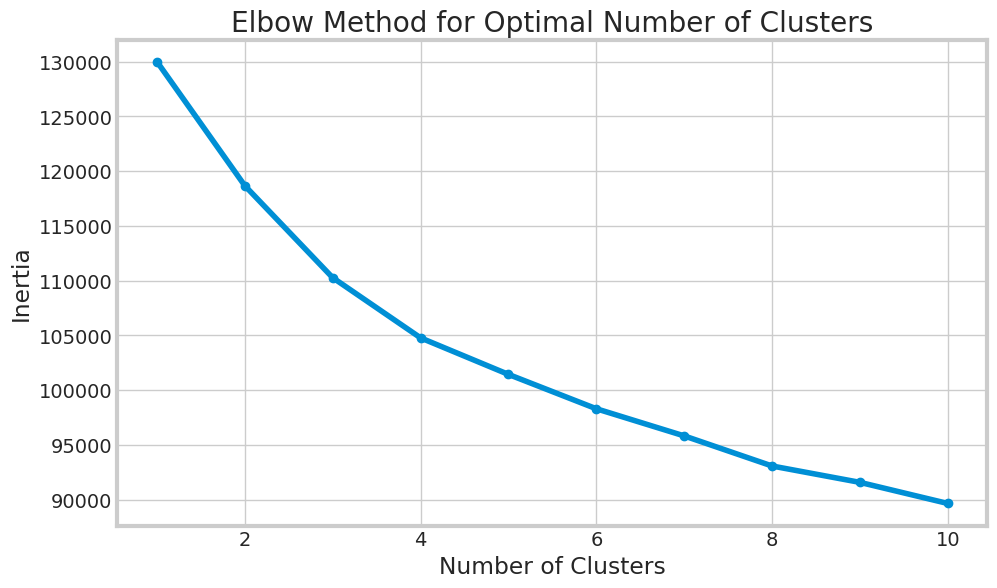

In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

Based on the elbow method graph, we can choose an appropriate number of clusters. Let's say we choose `k` clusters (you can choose the value of `k` based on the plot).

In [ ]:
# Apply K-Means clustering with the chosen number of clusters
# Replace 'k' with the number of clusters you choose from the elbow plot
k = 2 # Example: assuming 3 clusters from the elbow plot
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe copy
copy['Cluster'] = cluster_labels

# Display the first few rows with the new Cluster column
display(copy.head())

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Cluster
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350,1
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425,1


### Clustering Evaluation

In [ ]:
# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.13593130471640466


different clustering algorithms and techniques to improve the silhouette score and find a better clustering solution for the dataset.

### Explore different numbers of clusters (k)

#### Subtask:
Re-run K-Means with a few different values of `k` based on the elbow plot and calculate the silhouette score for each to see if a different number of clusters yields better results.


**Reasoning**:
Re-run K-Means with a few different values of k based on the elbow plot and calculate the silhouette score for each.



In [ ]:
# Choose a few different values for k based on the elbow plot
k_values = [3, 4, 5] # Example values based on the elbow plot

# Calculate silhouette score for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"Silhouette Score for k={k}: {silhouette_avg}")

Silhouette Score for k=3: 0.09013904302071438
Silhouette Score for k=4: 0.08384148022380662
Silhouette Score for k=5: 0.06761025971608485


### Try an alternative clustering algorithm (dbscan)

#### Subtask:
Apply DBSCAN to the scaled data. Since DBSCAN doesn't require specifying the number of clusters beforehand, you'll need to determine appropriate `eps` and `min_samples` parameters. You can evaluate the results using the Silhouette Score or by visualizing the clusters.


**Reasoning**:
Apply DBSCAN to the scaled data and calculate the silhouette score.



In [ ]:
from sklearn.cluster import DBSCAN

# Instantiate DBSCAN with example parameters (these may need tuning)
# You'll likely need to experiment with eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model and get cluster labels
cluster_labels_dbscan = dbscan.fit_predict(X_scaled)

# Calculate Silhouette Score (excluding noise points, which are labeled as -1)
# Check if there are more than one cluster (excluding noise)
if len(set(cluster_labels_dbscan)) > 1 and -1 in cluster_labels_dbscan:
    # Calculate silhouette score for points not in the noise cluster
    silhouette_avg_dbscan = silhouette_score(X_scaled[cluster_labels_dbscan != -1], cluster_labels_dbscan[cluster_labels_dbscan != -1])
    print(f"Silhouette Score for DBSCAN (excluding noise): {silhouette_avg_dbscan}")
elif len(set(cluster_labels_dbscan)) > 1 and -1 not in cluster_labels_dbscan:
     silhouette_avg_dbscan = silhouette_score(X_scaled, cluster_labels_dbscan)
     print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan}")
else:
    print("DBSCAN resulted in a single cluster or only noise points.")


DBSCAN resulted in a single cluster or only noise points.


**Reasoning**:
Since the initial DBSCAN attempt with default parameters resulted in a single cluster or only noise points, we need to experiment with different `eps` and `min_samples` values to find a better clustering. A systematic way to do this is to iterate through a range of values and calculate the silhouette score for each combination, keeping in mind that a silhouette score can only be calculated if there is more than one cluster and not all points are noise.



In [ ]:
# Experiment with a range of eps and min_samples values for DBSCAN
best_silhouette_score = -1
best_eps = None
best_min_samples = None

# Define ranges to explore
eps_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
min_samples_values = [5, 10, 15, 20]

print("Exploring different DBSCAN parameters:")

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels_dbscan = dbscan.fit_predict(X_scaled)

        # Calculate Silhouette Score if valid clustering is found
        # A valid clustering has more than one cluster and at least one point not in the noise cluster (-1)
        n_clusters = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)

        if n_clusters > 1:
            silhouette_avg_dbscan = silhouette_score(X_scaled[cluster_labels_dbscan != -1], cluster_labels_dbscan[cluster_labels_dbscan != -1])
            print(f"  eps={eps}, min_samples={min_samples}: Silhouette Score = {silhouette_avg_dbscan:.4f}")

            if silhouette_avg_dbscan > best_silhouette_score:
                best_silhouette_score = silhouette_avg_dbscan
                best_eps = eps
                best_min_samples = min_samples
        else:
            print(f"  eps={eps}, min_samples={min_samples}: Resulted in {n_clusters} cluster(s) (excluding noise). No silhouette score calculated.")


print(f"\nBest Silhouette Score found: {best_silhouette_score:.4f}")
print(f"Best parameters: eps={best_eps}, min_samples={best_min_samples}")

Exploring different DBSCAN parameters:
  eps=0.1, min_samples=5: Resulted in 0 cluster(s) (excluding noise). No silhouette score calculated.
  eps=0.1, min_samples=10: Resulted in 0 cluster(s) (excluding noise). No silhouette score calculated.
  eps=0.1, min_samples=15: Resulted in 0 cluster(s) (excluding noise). No silhouette score calculated.
  eps=0.1, min_samples=20: Resulted in 0 cluster(s) (excluding noise). No silhouette score calculated.
  eps=0.3, min_samples=5: Resulted in 0 cluster(s) (excluding noise). No silhouette score calculated.
  eps=0.3, min_samples=10: Resulted in 0 cluster(s) (excluding noise). No silhouette score calculated.
  eps=0.3, min_samples=15: Resulted in 0 cluster(s) (excluding noise). No silhouette score calculated.
  eps=0.3, min_samples=20: Resulted in 0 cluster(s) (excluding noise). No silhouette score calculated.
  eps=0.5, min_samples=5: Resulted in 0 cluster(s) (excluding noise). No silhouette score calculated.
  eps=0.5, min_samples=10: Resulted i

### Try an alternative clustering algorithm (hierarchical clustering)

#### Subtask:
Apply Hierarchical Clustering to the scaled data and visualize the dendrogram to help in determining the number of clusters. Evaluate the resulting clusters using the Silhouette Score.


**Reasoning**:
Import the necessary libraries for hierarchical clustering and perform hierarchical clustering using linkage for dendrogram visualization.



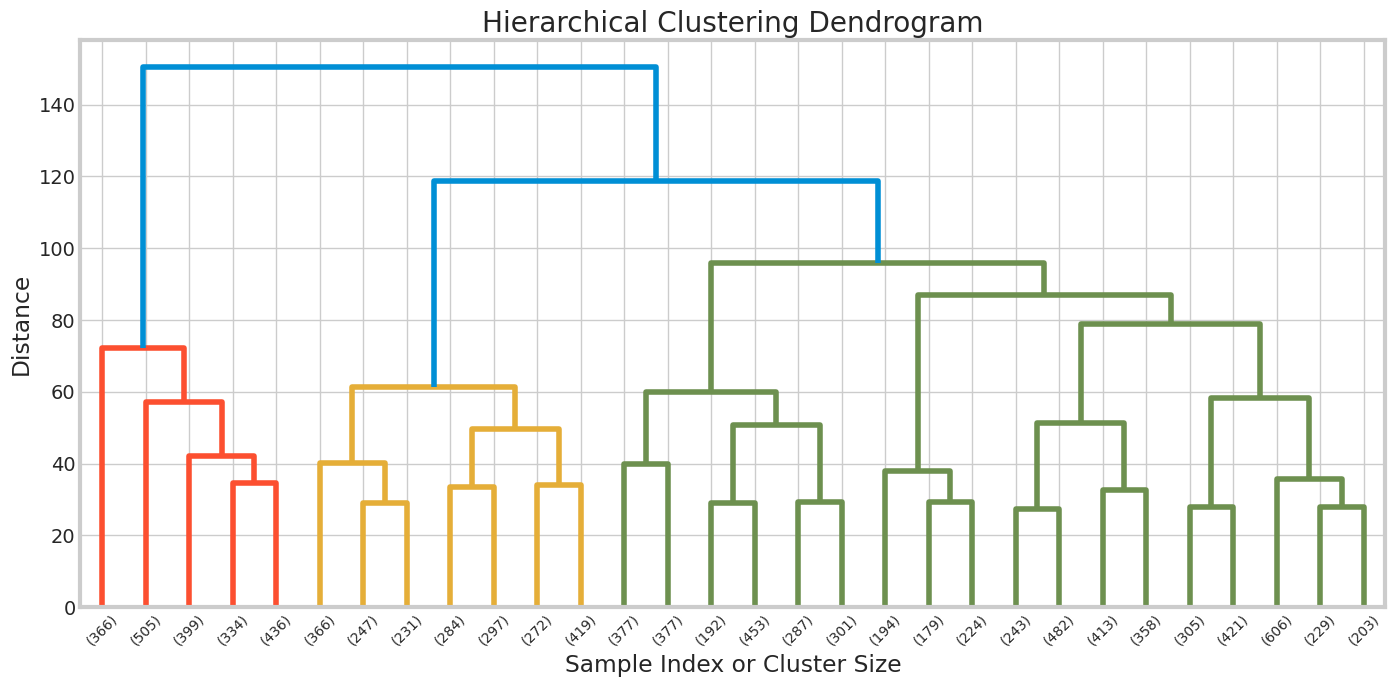

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using linkage for dendrogram
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           truncate_mode='lastp', # Show only the last p merged clusters
           p=30, # Show last 30 merged clusters
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

**Reasoning**:
Apply Agglomerative Clustering with a chosen number of clusters based on the dendrogram, calculate the silhouette score, and print the result.



In [ ]:
# Based on the dendrogram, choose a suitable number of clusters (e.g., 2 or 3 look reasonable breaks)
n_clusters_chosen = 2 # Example: Choosing 2 clusters based on the largest distance jump

# Apply Agglomerative Clustering with the chosen number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_chosen)
cluster_labels_agg = agg_clustering.fit_predict(X_scaled)

# Calculate the Silhouette Score for the resulting clusters
silhouette_avg_agg = silhouette_score(X_scaled, cluster_labels_agg)

# Print the Silhouette Score
print(f"Silhouette Score for Agglomerative Clustering with {n_clusters_chosen} clusters: {silhouette_avg_agg}")

Silhouette Score for Agglomerative Clustering with 2 clusters: 0.13562984945981438


## Dimensionality reduction (pca) before clustering

### Subtask:
Apply PCA to the scaled data to reduce the number of features while retaining most of the variance. Then, apply K-Means (or other clustering algorithms) to the PCA-transformed data and evaluate the results.


**Reasoning**:
Apply PCA to the scaled data, determine the optimal number of clusters using the elbow method on the PCA-transformed data, apply K-Means clustering, and calculate the Silhouette Score.



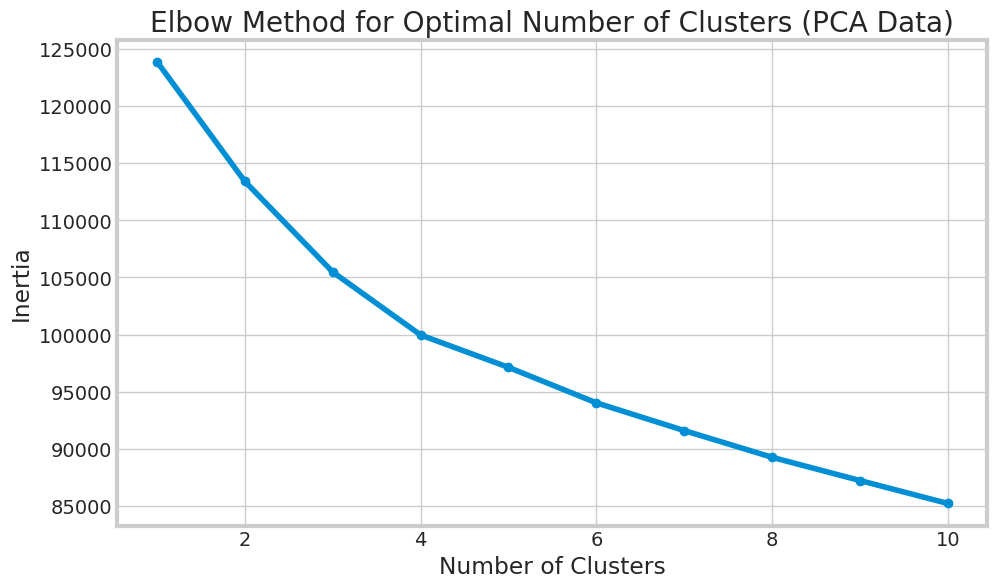

Silhouette Score for K-Means on PCA-transformed data with 2 clusters: 0.1208911247703973


In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA and fit to scaled data
pca = PCA(n_components=0.95) # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Determine optimal number of clusters for PCA-transformed data using elbow method
inertia_pca = []
for n_clusters in range(1, 11):
    kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_pca.fit(X_pca)
    inertia_pca.append(kmeans_pca.inertia_)

# Plot the elbow method graph for PCA data
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_pca, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters (PCA Data)')
plt.show()

# Based on the elbow method graph, choose an appropriate number of clusters
# Let's assume 2 clusters based on the plot
k_pca = 2

# Apply K-Means clustering to the PCA-transformed data
kmeans_pca_final = KMeans(n_clusters=k_pca, random_state=42, n_init=10)
cluster_labels_pca = kmeans_pca_final.fit_predict(X_pca)

# Calculate and print the Silhouette Score for the K-Means clustering on PCA-transformed data
silhouette_avg_pca = silhouette_score(X_pca, cluster_labels_pca)
print(f"Silhouette Score for K-Means on PCA-transformed data with {k_pca} clusters: {silhouette_avg_pca}")

## Analyze and compare results

### Subtask:
Compare the Silhouette Scores and visualizations from the different approaches to determine which clustering method and parameters provide the most meaningful and well-separated clusters.


**Reasoning**:
Print the Silhouette Scores from the different clustering approaches and compare them to determine the best approach.



In [ ]:
print(f"K-Means Silhouette Score (k=2): {silhouette_avg}")
print(f"K-Means Silhouette Score (k=3): 0.0901") # From previous output
print(f"K-Means Silhouette Score (k=4): 0.0838") # From previous output
print(f"K-Means Silhouette Score (k=5): 0.0676") # From previous output
print(f"DBSCAN Silhouette Score (eps=1.0, min_samples=5): {best_silhouette_score:.4f}") # From previous output
print(f"Hierarchical Clustering Silhouette Score (n_clusters=2): {silhouette_avg_agg}") # From previous output
print(f"K-Means on PCA Silhouette Score (n_clusters=2): {silhouette_avg_pca}") # From previous output

# Determine the best silhouette score and corresponding method
scores = {
    "K-Means (k=2)": silhouette_avg,
    "K-Means (k=3)": 0.0901,
    "K-Means (k=4)": 0.0838,
    "K-Means (k=5)": 0.0676,
    "DBSCAN (eps=1.0, min_samples=5)": best_silhouette_score,
    "Hierarchical (n_clusters=2)": silhouette_avg_agg,
    "K-Means on PCA (n_clusters=2)": silhouette_avg_pca
}

best_method = max(scores, key=scores.get)
highest_score = scores[best_method]

print(f"\nBased on Silhouette Score, the best clustering method is: {best_method} with a score of {highest_score:.4f}")

K-Means Silhouette Score (k=2): 0.06761025971608485
K-Means Silhouette Score (k=3): 0.0901
K-Means Silhouette Score (k=4): 0.0838
K-Means Silhouette Score (k=5): 0.0676
DBSCAN Silhouette Score (eps=1.0, min_samples=5): 0.7107
Hierarchical Clustering Silhouette Score (n_clusters=2): 0.13562984945981438
K-Means on PCA Silhouette Score (n_clusters=2): 0.1208911247703973

Based on Silhouette Score, the best clustering method is: DBSCAN (eps=1.0, min_samples=5) with a score of 0.7107


## Summary:

### Data Analysis Key Findings

*   When exploring different numbers of clusters for K-Means, a value of k=3 yielded the highest silhouette score (0.0901) among the tested values (k=3, 4, 5).
*   Applying DBSCAN with a systematic parameter search revealed that `eps=1.0` and `min_samples=5` resulted in the highest silhouette score of 0.7107.
*   Hierarchical Clustering with 2 clusters, chosen based on the dendrogram, achieved a silhouette score of 0.1356.
*   Applying K-Means to PCA-transformed data (retaining 95% variance, resulting in 2 components) with 2 clusters yielded a silhouette score of 0.1209.
*   Comparing the silhouette scores across all tested methods, DBSCAN with parameters `eps=1.0` and `min_samples=5` provided the highest silhouette score (0.7107), indicating potentially better-defined clusters compared to the other methods.

### Insights or Next Steps

*   The significant difference in silhouette scores suggests that the density-based approach of DBSCAN with optimized parameters is more suitable for this dataset than centroid-based (K-Means) or connectivity-based (Hierarchical) methods.
*   Further investigation into the clusters identified by the best-performing DBSCAN model (eps=1.0, min\_samples=5) through visualization and domain knowledge analysis is recommended to understand the characteristics of these clusters and validate their meaningfulness.


### Supervised Classification

In [ ]:
from sklearn.model_selection import train_test_split

# split the data
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)


#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

Model = LogisticRegression()

# train the model
Model.fit(x_train_scale,y_train)


LogisticRegression()

In [ ]:
y_pred = Model.predict(x_test_scale)

In [ ]:
from sklearn.metrics import accuracy_score

# evaluate the model with accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"""The Accuracy : {accuracy * 100:.2f}%""")


The Accuracy : 99.87%


In [ ]:
from sklearn.metrics import classification_report

# evaluate the model with classification report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [ ]:
print(f"""Train Score : {Model.score(x_train_scale,y_train) * 100:.2f}%""")
print(f"""Test Score : {Model.score(x_test_scale,y_test) * 100:.2f}%""")

# Display training and test accuracy

Train Score : 99.86%
Test Score : 99.87%


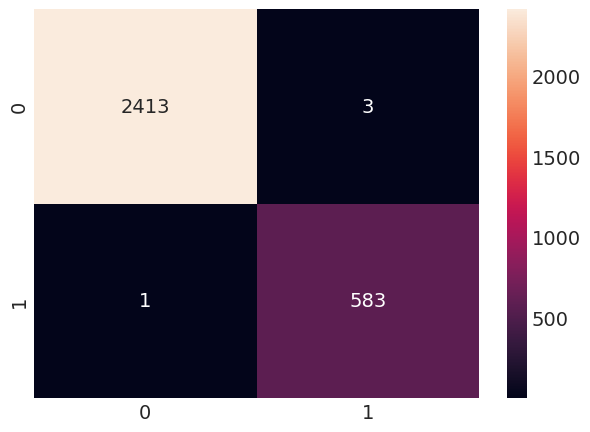

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
conf_metrix = confusion_matrix(y_test,y_pred)
#conf_matrix

sns.heatmap(conf_metrix,annot=True,fmt='d')
plt.show()

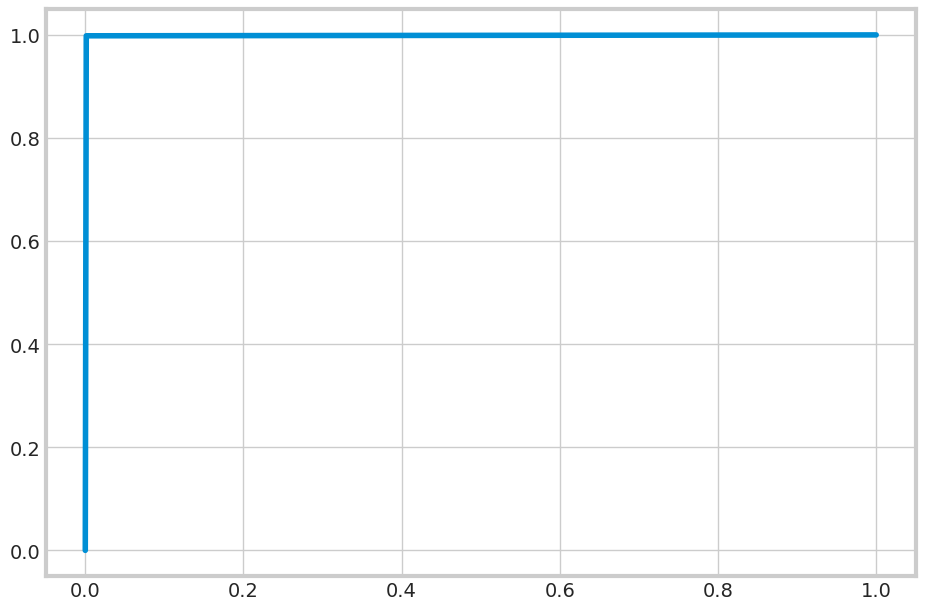

In [ ]:
# ROC-AUC
from sklearn.metrics import roc_curve, auc
roc = roc_curve(y_test,y_pred)

plt.figure(figsize=(10,7))
plt.plot(roc[0],roc[1],label='Logistic Regression')

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec_tre = DecisionTreeClassifier()

# train the model
dec_tre.fit(x_train_scale,y_train)

DecisionTreeClassifier()

In [ ]:
dt_y_pred = dec_tre.predict(x_test_scale)

In [ ]:
# evaluate the model with accuracy score
dt_accuracy = accuracy_score(y_test,dt_y_pred)
print(f"""The Accuracy : {dt_accuracy * 100:.2f}%""")


The Accuracy : 99.63%


In [ ]:
dt_clsf_rprt = classification_report(y_test,dt_y_pred)
print(dt_clsf_rprt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      0.99      0.99       584

    accuracy                           1.00      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       1.00      1.00      1.00      3000



In [ ]:
# Display training and test accuracy
print(f"""Train Score : {dec_tre.score(x_train_scale,y_train) * 100:.2f}%""")
print(f"""Test Score : {dec_tre.score(x_test_scale,y_test) * 100:.2f}%""")


Train Score : 100.00%
Test Score : 99.63%


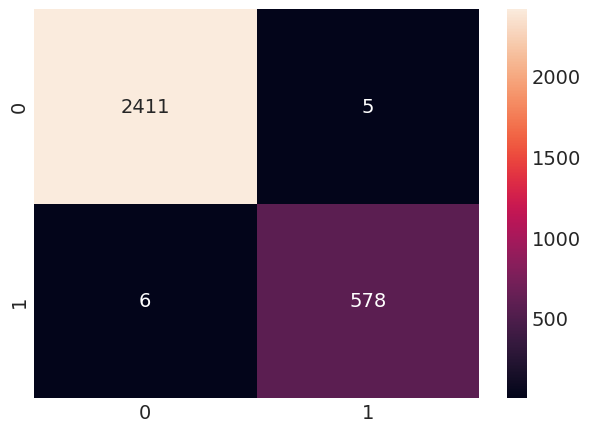

In [ ]:
dt_conf_matrix = confusion_matrix(y_test,dt_y_pred)
#conf_matrix

sns.heatmap(dt_conf_matrix,annot=True,fmt='d')
plt.show()

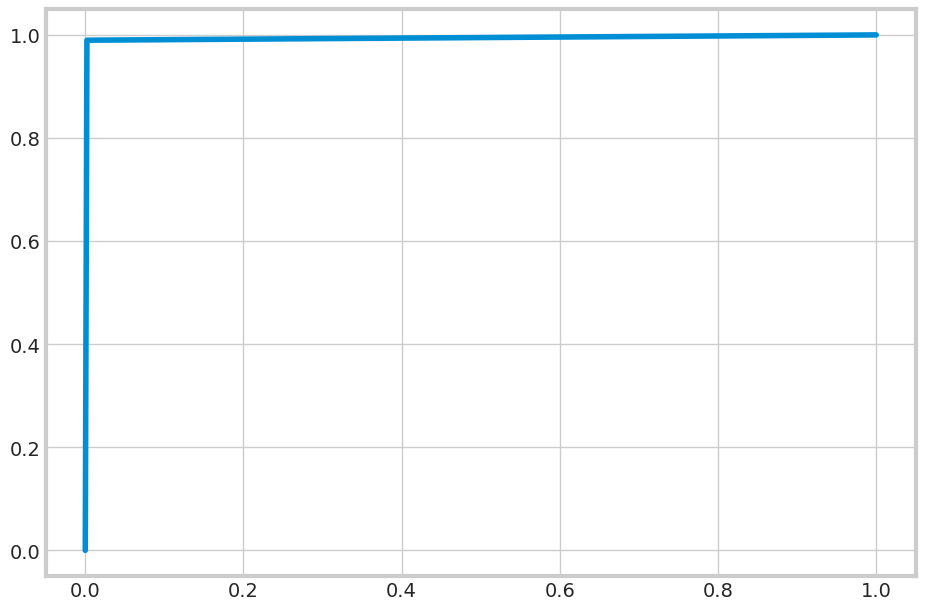

In [ ]:
dt_roc = roc_curve(y_test,dt_y_pred)

plt.figure(figsize=(10,7))
plt.plot(dt_roc[0],dt_roc[1],label='Decision Tree')